In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 16 x 16 dim Encoding

In [40]:
def get_angles(pos, i, d_model):
#     angle_rates = 1 / np.power(10000, (2* (i//2))) / np.float32(d_model)
    angle_rates = 1 / np.power(10000, (2* (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)
    
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding  = angle_rads[np.newaxis, ...]
    
    return pos_encoding

In [41]:
tokens = 16
dimensions = 16

pos_encoding = positional_encoding(tokens, dimensions)

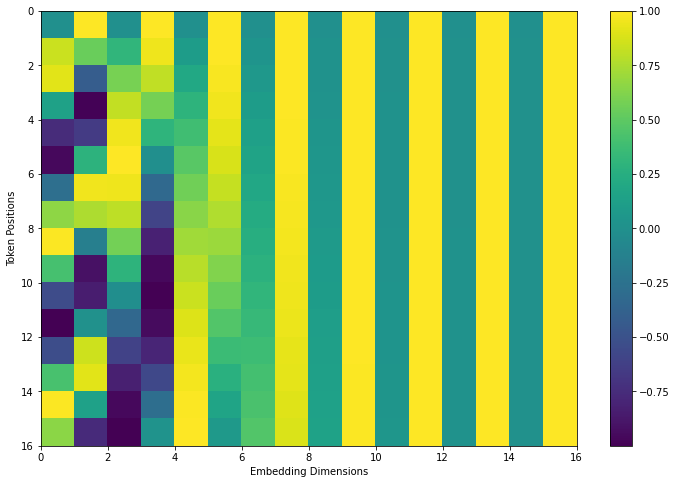

In [42]:
plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim(0, dimensions)
plt.ylabel('Token Positions')
plt.ylim(tokens, 0)
plt.colorbar()
plt.show()

# 2. Gram Schmidt Orthogonalization

In [43]:
# Load Two encodings
b1 = pos_encoding[0][0]
b2 = pos_encoding[0][1]

# View Encodings
print('b1 =',b1)
print('b2 =',b2)
print('\n')

# Get Norms of Encodings (Must be equal to 1 to be a unit vector)
print('norm_b1 =',np.linalg.norm(b1))
print('norm_b2 =',np.linalg.norm(b2))
print('\n')

# Get Dot product of the Encodings (Must be equal to 0 to be orthogonal)
print('b1_dot_b2 =', np.dot(b1,b2))

b1 = [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
b2 = [8.41470985e-01 5.40302306e-01 3.10983593e-01 9.50415280e-01
 9.98334166e-02 9.95004165e-01 3.16175064e-02 9.99500042e-01
 9.99983333e-03 9.99950000e-01 3.16227239e-03 9.99995000e-01
 9.99999833e-04 9.99999500e-01 3.16227761e-04 9.99999950e-01]


norm_b1 = 2.8284271247461903
norm_b2 = 2.8284271247461903


b1_dot_b2 = 7.4851662434875


Assuming B is a set of basis vectors, the vectors are not unit vectors and they are not orthogonal. Therefore they are also not orthonormal.

In [44]:
def gs(X):
    Q,R = np.linalg.qr(X)
    return Q

In [45]:
GS_pos_encoding = gs(pos_encoding[0])
# print(GS_pos_encoding)
GS_b1 = GS_pos_encoding[0]
GS_b2 = GS_pos_encoding[1]

# View Encodings
print('GS_b1 =',GS_b1)
print('GS_b2 =',GS_b2)
print('\n')

# Get Norms of Encodings (Must be equal to 1 to be a unit vector)
print('norm_GS_b1 =',np.linalg.norm(GS_b1))
print('norm_GS_b2 =',np.linalg.norm(GS_b2))
print('\n')

# Get Dot product of the Encodings (Must be equal to 0 to be orthogonal)
print('GS_b1_dot_GS__b2 =', np.dot(GS_b1,GS_b2))

GS_b1 = [ 0.00000000e+00 -3.50750078e-01 -3.03576406e-02 -3.51028054e-01
 -2.77145950e-01  5.17564662e-01 -4.70571147e-01 -3.73498388e-01
 -1.84611365e-01  1.03502720e-01 -4.40628769e-02  2.04538948e-02
  6.15010058e-03  4.99932726e-04 -2.88379861e-03 -3.21507291e-03]
GS_b2 = [-0.29995127 -0.19368307 -0.16973745 -0.25463363 -0.21054296  0.26525884
  0.09625185  0.4663709   0.46256966 -0.38541339  0.22896503 -0.13533516
 -0.05443513 -0.00661344  0.02338032  0.02453312]


norm_GS_b1 = 0.9999999999999999
norm_GS_b2 = 1.0


GS_b1_dot_GS__b2 = 1.6653345369377348e-16


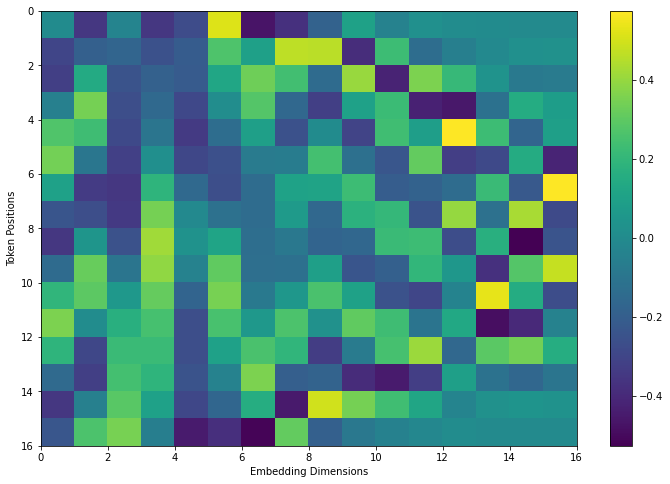

In [46]:
plt.figure(figsize=(12,8))
plt.pcolormesh(GS_pos_encoding, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim(0, dimensions)
plt.ylabel('Token Positions')
plt.ylim(tokens, 0)
plt.colorbar()
plt.show()